129L Section 3 <br>
Task 1: Turing machine for binary multiplication

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

In [18]:
class TuringMachine:
    def __init__(self, tape, transitions, initial_state, halt_states):
        self.tape = list(tape)  # Convert tape to a mutable list
        self.head = 0           # Start at the leftmost position
        self.state = initial_state
        self.transitions = transitions
        self.halt_states = halt_states
        self.tape_history = []  # To store tape snapshots

    def step(self):
        """Perform a single step of the Turing machine."""
        symbol = self.tape[self.head]
        key = (self.state, symbol)

        if key in self.transitions:
            new_state, write_symbol, direction = self.transitions[key]
            self.tape[self.head] = write_symbol
            self.state = new_state
            self.head += 1 if direction == 'R' else -1

            # Expand tape if head moves beyond bounds
            if self.head < 0:
                self.tape.insert(0, 'B')  # Add blank to the left
                self.head = 0
            elif self.head >= len(self.tape):
                self.tape.append('B')  # Add blank to the right

        else:
            self.state = 'HALT'  # Transition to halt if no valid transition

        # Record the current state of the tape
        self.tape_history.append((self.state, ''.join(self.tape), self.head))

    def run(self):
        """Run the Turing machine until it halts."""
        while self.state not in self.halt_states:
            self.step()

    def save_history(self, filename):
        """Save the tape history to a .dat file."""
        with open(filename, 'w') as f:
            for state, tape, head in self.tape_history:
                # Format: State, tape, head position
                f.write(f"{state}\t{tape}\t{head}\n")

# Binary multiplication Turing machine configuration
transitions = {
    # Initial state: Mark the first digit in the first number
    ('q0', '1'): ('q1', 'X', 'R'),
    ('q0', '0'): ('q1', 'Y', 'R'),

    # Move to the separator '#'
    ('q1', '1'): ('q1', '1', 'R'),
    ('q1', '0'): ('q1', '0', 'R'),
    ('q1', '#'): ('q2', '#', 'R'),

    # Mark the first digit in the second number
    ('q2', '1'): ('q3', 'X', 'L'),
    ('q2', '0'): ('q3', 'X', 'L'),

    # Move back to the separator '#'
    ('q3', '1'): ('q3', '1', 'L'),
    ('q3', '0'): ('q3', '0', 'L'),
    ('q3', '#'): ('q4', '#', 'L'),

    # Move back to the first number
    ('q4', 'X'): ('q4', 'X', 'L'),
    ('q4', '1'): ('q5', 'X', 'R'),
    ('q4', '0'): ('q5', 'X', 'R'),

    # Repeat the process or finish when complete
    ('q5', '1'): ('q5', '1', 'R'),
    ('q5', '0'): ('q5', '0', 'R'),
    ('q5', '#'): ('q6', '#', 'R'),

    # Handle final states and halting logic here...
}

# Initial configuration
tape = "11#11$"
initial_state = 'q0'
halt_states = ['HALT']

# Instantiate the Turing machine
tm = TuringMachine(tape, transitions, initial_state, halt_states)

# Run the Turing machine
tm.run()

# Save the history to a .dat file
filename = "11x11.dat"  # Replace with dynamic input as needed
tm.save_history(filename)

print(f"Multiplication complete. Tape history saved to {filename}.")

Multiplication complete. Tape history saved to 11x11.dat.


In [41]:
# Code for unary multiplication

class TuringMachine:
    def __init__(self, tape, states, start_state, accept_state, reject_state):
        self.tape = list(tape)  # Tape is represented as a list
        self.head = 0  # Tape head position
        self.states = states  # State transition rules
        self.state = start_state  # Current state
        self.accept_state = accept_state
        self.reject_state = reject_state
        self.tape_history = []  # To store tape snapshots


    def step(self):
        symbol = self.tape[self.head]
        if (self.state, symbol) in self.states:
            new_state, write_symbol, direction = self.states[(self.state, symbol)]
            self.tape[self.head] = write_symbol
            self.state = new_state
            if direction == 'R':
                self.head += 1
            elif direction == 'L':
                self.head -= 1

            if self.head < 0:
                self.tape.insert(0, '_')  # Add blank space to the left
                self.head = 0
            elif self.head >= len(self.tape):
                self.tape.append('_')  # Add blank space to the right
        else:
            self.state = self.reject_state

        self.tape_history.append((self.state, ''.join(self.tape), self.head))

    def run(self, max_steps=10000):
        steps = 0
        while self.state != self.accept_state and self.state != self.reject_state:
            if steps >= max_steps:
                print("Error: Exceeded maximum number of steps. Possible infinite loop.")
                break
            self.print_tape(steps)  # Print the current tape state with step count
            self.step()
            steps += 1
        self.print_tape(steps)  # Print the final tape state
        return self.state == self.accept_state

    def print_tape(self, step):
        tape_str = ''.join(self.tape)
        head_marker = ' ' * self.head + '^'  # Marker to show the tape head position
        # print(f"Step: {step}, State: {self.state}\n{tape_str}\n{head_marker}\n")

    def save_history(self, filename):
        """Save the tape history to a .dat file."""
        with open(filename, 'w') as f:
            for state, tape, head in self.tape_history:
                # Format: State, tape, head position
                f.write(f"{state}\t{tape}\t{head}\n")

# Define the custom transition rules
custom_transitions = {
    # Initial state: Mark the first digit in the first number
    ('q0', '0'): ('q0', '0', 'R'),
    ('q0', 'C'): ('q1', 'C', 'R'),

    # Move to the separator '#'
    ('q1', '0'): ('q1', '0', 'R'),
    ('q1', '_'): ('q2', 'C', 'L'),

    ('q2', '0'): ('q2', '0', 'L'),
    ('q2', 'C'): ('q3', 'C', 'R'),

    ('q3', 'X'): ('q3', 'X', 'R'),
    ('q3', '0'): ('q4', 'X', 'L'),
    ('q3', 'C'): ('q12', '_', 'R'),

    ('q4', 'X'): ('q4', 'X', 'L'),
    ('q4', 'C'): ('q5', 'C', 'L'),

    ('q5', 'Y'): ('q5', 'Y', 'L'),
    ('q5', '0'): ('q6', 'Y', 'R'),
    ('q5', '_'): ('q11', '_', 'R'),

    ('q6', 'Y'): ('q6', 'Y', 'R'),
    ('q6', 'C'): ('q7', 'C', 'R'),

    ('q7', '0'): ('q7', '0', 'R'),
    ('q7', 'C'): ('q8', 'C', 'R'),
    ('q7', 'X'): ('q7', 'X', 'R'),

    ('q8', '0'): ('q8', '0', 'R'),
    ('q8', '_'): ('q9', '0', 'L'),

    ('q9', '0'): ('q9', '0', 'L'),
    ('q9', 'C'): ('q10', 'C', 'L'),

    ('q10', '0'): ('q10', '0', 'L'),
    ('q10', 'X'): ('q10', 'X', 'L'),
    ('q10', 'C'): ('q5', 'C', 'L'),

    ('q11', 'Y'): ('q11', '0', 'R'),
    ('q11', 'C'): ('q3', 'C', 'R'),

    ('q12', '0'): ('q12', '0', 'L'), # halt
}

0 is unary representation of numbers. 00=2, 0000=4, etc. NOT BINARY
B is blank
C is separator between binary values (multiplier)
X and Y are placeholders to swap out with 0

In [49]:
tape = '000C00_'  # Example input: unary 3 * 2
machine = TuringMachine(tape, custom_transitions, 'q0', 'q12', 'reject')
if machine.run():
    pass
    # print('Result:', ''.join(machine.tape).strip('_'))
else:
    print('Computation rejected.')

filename = tape + ".dat"  # Save tape history to a .dat file
machine.save_history(filename)
print(f"Result = {machine.tape}. \nTape history saved to {filename}.")

Result = ['_', '0', '0', '0', 'C', 'X', 'X', '_', '0', '0', '0', '0', '0', '0']. 
Tape history saved to 000C00_.dat.


Now that the unary multiplication works, try a binary example

In [2]:
# Code for binary multiplication. 21 states in total, like the example

class TuringMachine:
    def __init__(self, tape, states, start_state, accept_state, reject_state):
        self.tape = list(tape)  # Tape is represented as a list
        self.head = 0  # Tape head position
        self.states = states  # State transition rules
        self.state = start_state  # Current state
        self.accept_state = accept_state
        self.reject_state = reject_state
        self.tape_history = []  # To store tape snapshots


    def step(self):
        symbol = self.tape[self.head]
        if (self.state, symbol) in self.states:
            new_state, write_symbol, direction = self.states[(self.state, symbol)]
            self.tape[self.head] = write_symbol
            self.state = new_state
            if direction == 'R':
                self.head += 1
            elif direction == 'L':
                self.head -= 1

            if self.head < 0:
                self.tape.insert(0, '_')  # Add blank space to the left
                self.head = 0
            elif self.head >= len(self.tape):
                self.tape.append('_')  # Add blank space to the right
        else:
            self.state = self.reject_state

        self.tape_history.append((self.state, ''.join(self.tape), self.head))

    def run(self, max_steps=10000):
        steps = 0
        while self.state != self.accept_state and self.state != self.reject_state:
            if steps >= max_steps:
                print("Error: Exceeded maximum number of steps. Possible infinite loop.")
                break
            self.print_tape(steps)  # Print the current tape state with step count
            self.step()
            steps += 1
        self.print_tape(steps)  # Print the final tape state
        return self.state == self.accept_state

    def print_tape(self, step):
        tape_str = ''.join(self.tape)
        head_marker = ' ' * self.head + '^'  # Marker to show the tape head position
        print(f"Step: {step}, State: {self.state}\n{tape_str}\n{head_marker}\n")

    def save_history(self, filename):
        """Save the tape history to a .dat file."""
        with open(filename, 'w') as f:
            for state, tape, head in self.tape_history:
                # Format: State, tape, head position
                f.write(f"{state}\t{tape}\t{head}\n")

# Define the custom transition rules
custom_transitions = {
    # Initial state: Mark the first digit in the first number
    ('start', '0'): ('init', '0', 'L'),
    ('start', '1'): ('init', '1', 'L'),

    # Move to the separator '#'
    ('init', '_'): ('right', '+', 'R'),

    ('right', '0'): ('right', '0', 'R'),
    ('right', '1'): ('right', '1', 'R'),
    ('right', '*'): ('right', '*', 'R'),
    ('right', '_'): ('readB', '_', 'L'),

    ('readB', '1'): ('addA', '_', 'L'),
    ('readB', '0'): ('doubleL', '_', 'L'),

    ('addA', '0'): ('addA', '0', 'L'),
    ('addA', '1'): ('addA', '1', 'L'),
    ('addA', '*'): ('read', '*', 'L'),

    ('read', '+'): ('rewrite', '+', 'L'),
    ('read', '1'): ('have1', 'C', 'L'),
    ('read', '0'): ('have0', 'C', 'L'),

    ('back0', '0'): ('back0', '0', 'R'),
    ('back0', '1'): ('back0', '1', 'R'),
    ('back0', 'O'): ('back0', 'O', 'R'),
    ('back0', 'I'): ('back0', 'I', 'R'),
    ('back0', '+'): ('back0', '+', 'R'),
    ('back0', 'C'): ('read', '0', 'L'),

    ('have0', '0'): ('have0', '0', 'L'),
    ('have0', '1'): ('have0', '1', 'L'),
    ('have0', '+'): ('add0', '+', 'L'),

    ('add0', '0'): ('back0', 'O', 'R'),
    ('add0', '_'): ('back0', 'O', 'R'),
    ('add0', '1'): ('back0', 'I', 'R'),
    ('add0', 'O'): ('add0', 'O', 'L'),
    ('add0', 'I'): ('back0', 'I', 'L'),

    ('rewrite', '0'): ('rewrite', '0', 'L'),
    ('rewrite', '1'): ('rewrite', '1', 'L'),
    ('rewrite', 'I'): ('rewrite', '1', 'L'),
    ('rewrite', 'O'): ('rewrite', '0', 'L'),
    ('rewrite', '_'): ('double', '0', 'R'),

    ('double', '0'): ('double', '0', 'R'),
    ('double', '1'): ('double', '1', 'R'),
    ('double', '+'): ('double', '+', 'R'),
    ('double', '*'): ('shift', '0', 'R'),

    ('shift', '_'): ('tidy', '_', 'L'),
    ('shift', '1'): ('shift1', '*', 'R'),
    ('shift', '0'): ('shift0', '*', 'R'),

    ('shift0', '0'): ('shift0', '0', 'R'),
    ('shift0', '1'): ('shift1', '0', 'R'),
    ('shift0', '_'): ('right', '0', 'R'),

    ('shift1', '1'): ('shift1', '1', 'R'),
    ('shift1', '0'): ('shift0', '1', 'R'),
    ('shift1', '_'): ('right', '1', 'R'),

    ('tidy', '0'): ('tidy', '_', 'L'),
    ('tidy', '1'): ('tidy', '_', 'L'),
    ('tidy', '+'): ('done', '_', 'L'),

    ('have1', '0'): ('have1', '0', 'L'),
    ('have1', '1'): ('have1', '1', 'L'),
    ('have1', '+'): ('add1', '+', 'L'),

    ('add1', 'O'): ('add1', 'O', 'L'),
    ('add1', 'I'): ('add1', 'I', 'L'),
    ('add1', '1'): ('carry', 'O', 'L'),
    ('add1', '0'): ('back1', 'I', 'R'),
    ('add1', '_'): ('back1', 'I', 'R'),

    ('carry', '1'): ('carry', '0', 'L'),
    ('carry', '0'): ('back1', '1', 'R'),
    ('carry', '_'): ('back1', '1', 'R'),

    ('back1', '0'): ('back1', '0', 'R'),
    ('back1', '1'): ('back1', '1', 'R'),
    ('back1', 'O'): ('back1', 'O', 'R'),
    ('back1', 'I'): ('back1', 'I', 'R'),
    ('back1', '+'): ('back1', '+', 'R'),
    ('back1', 'C'): ('read', '1', 'L'),

    ('doubleL', '*'): ('shift', '0', 'R'),
    ('doubleL', '0'): ('doubleL', '0', 'L'),
    ('doubleL', '1'): ('doubleL', '1', 'L'),

    ('done', '_'): ('done', '_', 'L'), # halt
}

In [64]:
tape = '11*10'  # Example input:
machine = TuringMachine(tape, custom_transitions, 'start', 'done', 'reject')
if machine.run():
    # print('Result:', ''.join(machine.tape).strip('_'))
    filename = tape + ".dat"  # Save tape history to a .dat file
    machine.save_history(filename)
    print(f"Result = {machine.tape}. \nTape history saved to {filename}.")
else:
    print('Computation rejected.')

Step: 0, State: start
11*10
^

Step: 1, State: init
_11*10
^

Step: 2, State: right
+11*10
 ^

Step: 3, State: right
+11*10
  ^

Step: 4, State: right
+11*10
   ^

Step: 5, State: right
+11*10
    ^

Step: 6, State: right
+11*10
     ^

Step: 7, State: right
+11*10_
      ^

Step: 8, State: readB
+11*10_
     ^

Step: 9, State: doubleL
+11*1__
    ^

Step: 10, State: doubleL
+11*1__
   ^

Step: 11, State: shift
+1101__
    ^

Step: 12, State: shift1
+110*__
     ^

Step: 13, State: right
+110*1_
      ^

Step: 14, State: readB
+110*1_
     ^

Step: 15, State: addA
+110*__
    ^

Step: 16, State: read
+110*__
   ^

Step: 17, State: have0
+11C*__
  ^

Step: 18, State: have0
+11C*__
 ^

Step: 19, State: have0
+11C*__
^

Step: 20, State: add0
_+11C*__
^

Step: 21, State: back0
O+11C*__
 ^

Step: 22, State: back0
O+11C*__
  ^

Step: 23, State: back0
O+11C*__
   ^

Step: 24, State: back0
O+11C*__
    ^

Step: 25, State: read
O+110*__
   ^

Step: 26, State: have1
O+1C0*__
  ^

Step: 27, State

**Binary multiplication Turing machine seems to work! (just ignore the first 0 in the output)**

Part b) Use your program to general the tape files for the following two binary
multiplication, 101001010111 · · · × 101000101 and 101111 · · · × 101001. Those
files should be accessible on Github

In [2]:
tape = '101001010111*101000101'  # Example input:
machine = TuringMachine(tape, custom_transitions, 'start', 'done', 'reject')
if machine.run():
    # print('Result:', ''.join(machine.tape).strip('_'))
    filename = tape + ".dat"  # Save tape history to a .dat file
    machine.save_history(filename)
    print(f"Result = {machine.tape}. \nTape history saved to {filename}.")
else:
    print('Computation rejected.')

Step: 0, State: start
101001010111*101000101
^

Step: 1, State: init
_101001010111*101000101
^

Step: 2, State: right
+101001010111*101000101
 ^

Step: 3, State: right
+101001010111*101000101
  ^

Step: 4, State: right
+101001010111*101000101
   ^

Step: 5, State: right
+101001010111*101000101
    ^

Step: 6, State: right
+101001010111*101000101
     ^

Step: 7, State: right
+101001010111*101000101
      ^

Step: 8, State: right
+101001010111*101000101
       ^

Step: 9, State: right
+101001010111*101000101
        ^

Step: 10, State: right
+101001010111*101000101
         ^

Step: 11, State: right
+101001010111*101000101
          ^

Step: 12, State: right
+101001010111*101000101
           ^

Step: 13, State: right
+101001010111*101000101
            ^

Step: 14, State: right
+101001010111*101000101
             ^

Step: 15, State: right
+101001010111*101000101
              ^

Step: 16, State: right
+101001010111*101000101
               ^

Step: 17, State: right
+101001010111*10100

In [3]:
tape = '101111*101001'  # Example input
machine = TuringMachine(tape, custom_transitions, 'start', 'done', 'reject')
if machine.run():
    # print('Result:', ''.join(machine.tape).strip('_'))
    filename = tape + ".dat"  # Save tape history to a .dat file
    machine.save_history(filename)
    print(f"Result = {machine.tape}. \nTape history saved to {filename}.")
else:
    print('Computation rejected.')

Step: 0, State: start
101111*101001
^

Step: 1, State: init
_101111*101001
^

Step: 2, State: right
+101111*101001
 ^

Step: 3, State: right
+101111*101001
  ^

Step: 4, State: right
+101111*101001
   ^

Step: 5, State: right
+101111*101001
    ^

Step: 6, State: right
+101111*101001
     ^

Step: 7, State: right
+101111*101001
      ^

Step: 8, State: right
+101111*101001
       ^

Step: 9, State: right
+101111*101001
        ^

Step: 10, State: right
+101111*101001
         ^

Step: 11, State: right
+101111*101001
          ^

Step: 12, State: right
+101111*101001
           ^

Step: 13, State: right
+101111*101001
            ^

Step: 14, State: right
+101111*101001
             ^

Step: 15, State: right
+101111*101001_
              ^

Step: 16, State: readB
+101111*101001_
             ^

Step: 17, State: addA
+101111*10100__
            ^

Step: 18, State: addA
+101111*10100__
           ^

Step: 19, State: addA
+101111*10100__
          ^

Step: 20, State: addA
+101111*10100__
 

Part c)

The state diagram is shown in Binary_Multiplication_Turing_Schematic.png, with a total of 21 states. 

Part d) computational complexity

L_a=2, L_b=3
  Max steps: 5
  Min steps: 5
  Avg steps: 5.00


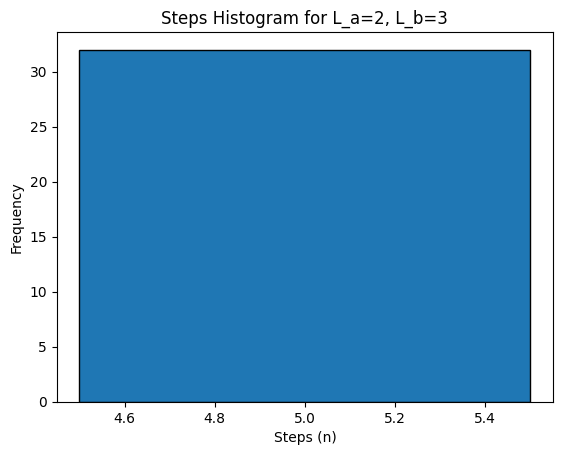

L_a=3, L_b=2
  Max steps: 6
  Min steps: 6
  Avg steps: 6.00


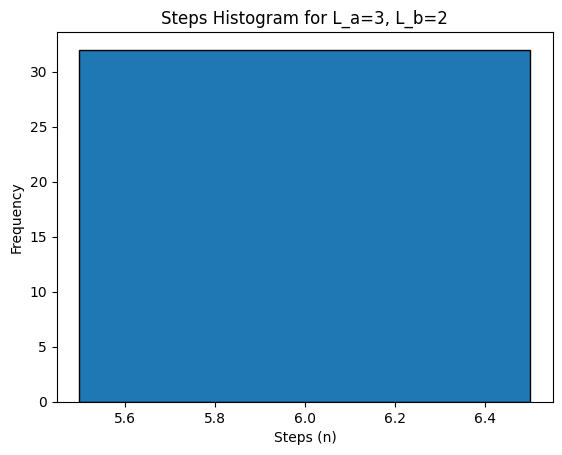

L_a=3, L_b=5
  Max steps: 6
  Min steps: 6
  Avg steps: 6.00


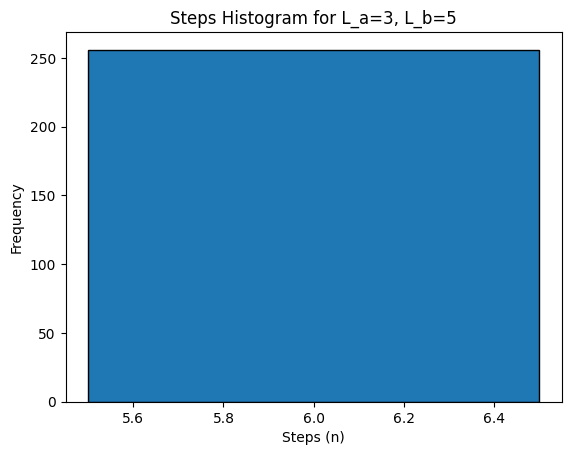

L_a=5, L_b=3
  Max steps: 8
  Min steps: 8
  Avg steps: 8.00


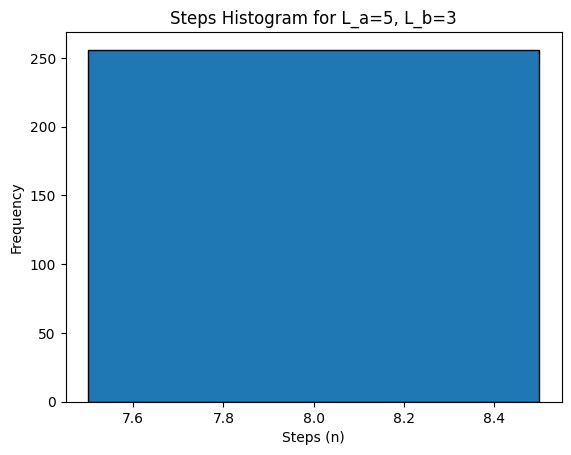

L_a=3, L_b=12
  Max steps: 6
  Min steps: 6
  Avg steps: 6.00


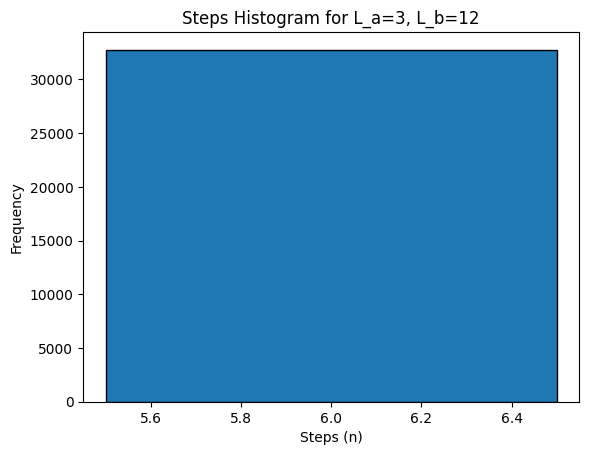

L_a=12, L_b=3
  Max steps: 15
  Min steps: 15
  Avg steps: 15.00


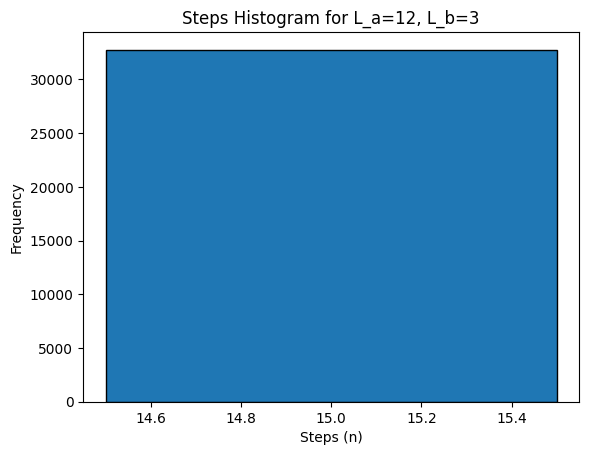

In [4]:
# Function to generate binary inputs of a specific length
def generate_binary_inputs(length):
    return ['{0:0{1}b}'.format(i, length) for i in range(2**length)]

# Function to simulate the Turing machine and count steps
def simulate_turing_machine(tape, machine, max_steps=10000):
    tm = TuringMachine(
        tape=list(tape),
        states=machine["transitions"],
        start_state=machine["start_state"],
        accept_state=machine["accept_state"],
        reject_state=machine["reject_state"],
    )
    steps = 0
    while tm.state != tm.accept_state and tm.state != tm.reject_state:
        if steps >= max_steps:
            break
        tm.step()
        steps += 1
    return steps

# Turing machine configuration
machine_config = {
    "transitions": custom_transitions,
    "start_state": "start",
    "accept_state": "done",
    "reject_state": "reject",
}

# Lengths to test
length_pairs = [(2, 3), (3, 2), (3, 5), (5, 3), (3, 12), (12, 3)]

# Statistics for each L_a, L_b
for L_a, L_b in length_pairs:
    inputs_a = generate_binary_inputs(L_a)
    inputs_b = generate_binary_inputs(L_b)

    steps = []
    for a, b in product(inputs_a, inputs_b):
        tape = f"{a}#{b}_"
        steps.append(simulate_turing_machine(tape, machine_config))

    # Calculate statistics
    max_n = max(steps)
    min_n = min(steps)
    avg_n = np.mean(steps)

    print(f"L_a={L_a}, L_b={L_b}")
    print(f"  Max steps: {max_n}")
    print(f"  Min steps: {min_n}")
    print(f"  Avg steps: {avg_n:.2f}")

    # Plot histogram
    plt.hist(steps, bins=range(min_n, max_n + 2), align="left", edgecolor="black")
    plt.title(f"Steps Histogram for L_a={L_a}, L_b={L_b}")
    plt.xlabel("Steps (n)")
    plt.ylabel("Frequency")
    plt.show()


Part e)

In [6]:
# Grid size
min_len, max_len = 2, 30

# Initialize a 2D array to store average steps
avg_steps_matrix = np.zeros((max_len - min_len + 1, max_len - min_len + 1))

# Compute average steps for each (a, b)
for a in range(min_len, max_len + 1):
    for b in range(min_len, max_len + 1):
        inputs_a = generate_binary_inputs(a)
        inputs_b = generate_binary_inputs(b)

        steps = []
        for x, y in product(inputs_a, inputs_b):
            tape = f"{x}#{y}_"
            steps.append(simulate_turing_machine(tape, machine_config))

        avg_steps_matrix[a - min_len, b - min_len] = np.mean(steps)

# Plot the heatmap
plt.figure(figsize=(10, 8))
plt.imshow(avg_steps_matrix, origin='lower', cmap='viridis', extent=(min_len, max_len, min_len, max_len))
plt.colorbar(label="Average Steps (⟨n⟩)")
plt.title("Heatmap of Average Complexity ⟨n⟩ for La,b")
plt.xlabel("L_a")
plt.ylabel("L_b")
plt.xticks(range(min_len, max_len + 1, 2))
plt.yticks(range(min_len, max_len + 1, 2))
plt.show()

KeyboardInterrupt: 